In [31]:
%pip install Prophet  


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install scikit-learn




SyntaxError: invalid syntax (182657945.py, line 1)

In [ ]:
pip install pandas


  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------- 1/4 [tzdata]
   ---------- ----------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


positionName
Data Scientist                                 45
Senior Data Scientist                          15
Senior Data Analyst                            12
Principal Data Scientist                        7
Lead Data Scientist                             7
Machine Learning Engineer                       6
AI/ML Engineer                                  6
Sr. Data Scientist                              6
Senior Machine Learning Engineer                5
AI Engineer                                     5
Data Scientist II                               4
Sr Data Scientist                               4
Software Engineer, Machine Learning             4
AI & Data Manager - Life Sciences R&D (CMC)     3
Machine Learning Scientist                      3
Senior AI Engineer                              3
Principal Statistical Programmer                3
Data Scientist III                              3
Lead Machine Learning Engineer                  3
ML Engineer                          

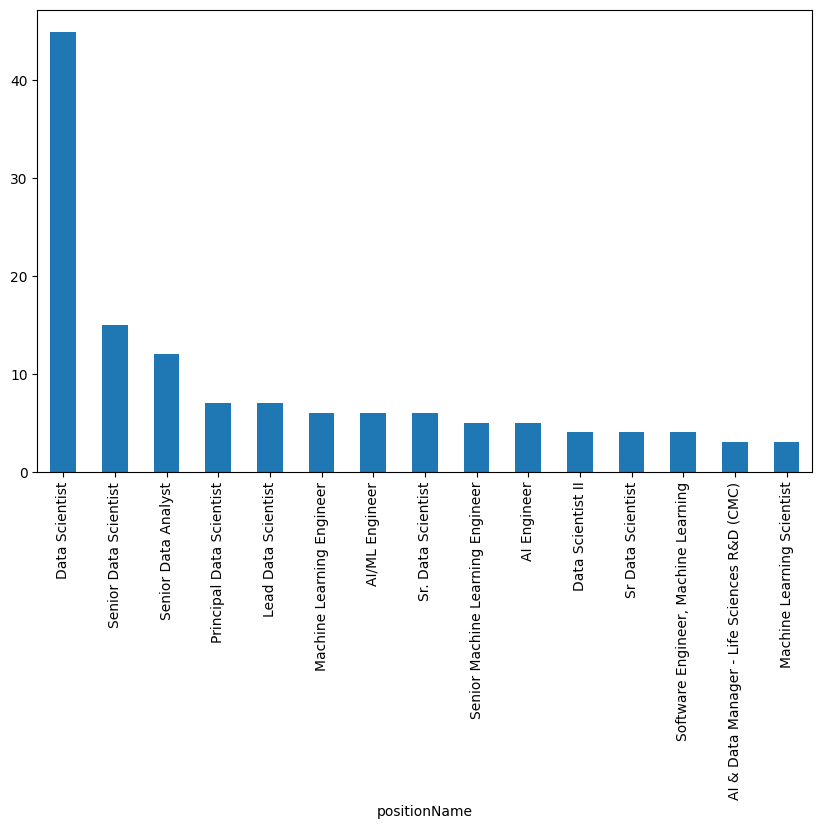

['00' '000' 'ability' 'accommodation' 'accommodations' 'additional'
 'advanced' 'ai' 'ai ml' 'algorithms' 'amazon' 'analysis' 'analytical'
 'analytics' 'apple' 'applicable' 'applicants' 'application'
 'applications' 'apply' 'applying' 'artificial' 'artificial intelligence'
 'assistance' 'aws' 'bachelor' 'bachelor degree' 'base' 'based' 'benefits'
 'best' 'best practices' 'bonus' 'build' 'building' 'business' 'candidate'
 'candidates' 'capabilities' 'capital' 'care' 'career' 'clients'
 'clinical' 'cloud' 'code' 'collaborate' 'collaboration' 'color' 'com']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv('../data/cleaned/jobs_cleaned.csv')
# top roles
print(df['positionName'].value_counts().head(20))
# Graph (matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df['positionName'].value_counts().head(15).plot(kind='bar')
plt.show()

# TF-IDF for skills (top features)
vec = TfidfVectorizer(max_features=300, stop_words='english', ngram_range=(1,2))
X = vec.fit_transform(df['text'].fillna(''))
print(vec.get_feature_names_out()[:50])


In [ ]:
#Create monthly counts per role:

df['posted_date'] = pd.to_datetime(df.get('posted_date', pd.NaT), errors='coerce')
df['posted_date'] = df['posted_date'].fillna(pd.Timestamp('2000-01-01'))

counts = df.groupby([pd.Grouper(key='posted_date', freq='M'), 'positionName']).size().unstack(fill_value=0)


C:\Users\Aniket\AppData\Local\Temp\ipykernel_20656\2318364909.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  counts = df.groupby([pd.Grouper(key='posted_date', freq='M'), 'positionName']).size().unstack(fill_value=0)


In [26]:
from prophet import Prophet

ts = counts['Data Scientist'].reset_index().rename(columns={'posted_date':'ds', 'Data Scientist':'y'})

# Remove NaN rows
ts = ts.dropna()

# Prophet tabhi chalega jab kam se kam 2 rows ho
if len(ts) >= 2:
    m = Prophet()
    m.fit(ts)
    future = m.make_future_dataframe(periods=12, freq='M')
    forecast = m.predict(future)
else:
    print("Not enough data points for Prophet. Need at least 2 dates with values.")


Not enough data points for Prophet. Need at least 2 dates with values.


In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example dataset
df = pd.DataFrame({
    'skill_python': [1, 0, 1, 1, 0],
    'skill_sql': [0, 1, 1, 0, 1],
    'experience': [2, 5, 3, 1, 4],
    'job_demand': [1, 0, 1, 1, 0]  # Target
})

# Features and target
X_features = df[['skill_python', 'skill_sql', 'experience']]
y = df['job_demand']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42
)

# Train model
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
import os
import joblib

# Ensure 'models' directory exists
os.makedirs("models", exist_ok=True)

# Save the trained model
joblib.dump(clf, "models/rf_demand.pkl")
print("Model saved successfully!")


Model saved successfully!
